In [1]:
import numpy as np # importing numpy library 
import pandas as pd # pandas library to load and create data frame and prepare data

In [2]:
#importing necessary libraries for natural language processing
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk

import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Avish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Do

True

In [6]:
#loading of data
columns = ["Id","Entity","Target","Text"]
data = pd.read_csv("twitter_training.csv",names=columns,header=None)

In [7]:
#first five records
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
#will keep only relevant features that will be used by the classifier
df = data[["Text","Target"]]

In [9]:
df.head()

,Text,Target
0,im getting on borderlands and i will murder yo...,Positive
1,I am coming to the borders and I will kill you...,Positive
2,im getting on borderlands and i will kill you ...,Positive
3,im coming on borderlands and i will murder you...,Positive
4,im getting on borderlands 2 and i will murder ...,Positive


In [10]:
#we can see that our data frame consist of 74682 records and 2 columns
df.shape

(74682, 2)

In [11]:
#information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73996 non-null  object
 1   Target  74682 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [12]:
#Need to remove duplicates to ensure have better accuracy
df= df.drop_duplicates()

In [13]:
#we remove the null value that we found
df = df.dropna()

<AxesSubplot:xlabel='Target', ylabel='count'>

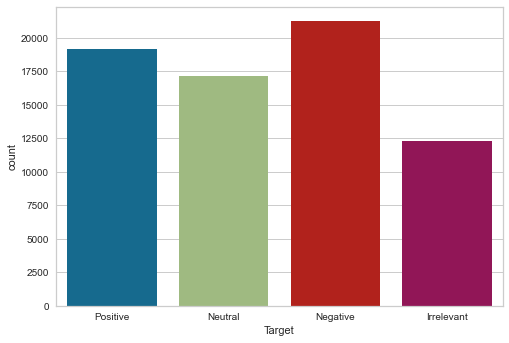

In [14]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Target",data=df)

In [15]:
#converting classes to numeric 
#we created an empty list and appended values to the list to represent a certain class
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [16]:
#new feature added named as sentiment with numeric values to represen target
df.head()

,Text,Target,Sentiment
0,im getting on borderlands and i will murder yo...,Positive,1
1,I am coming to the borders and I will kill you...,Positive,1
2,im getting on borderlands and i will kill you ...,Positive,1
3,im coming on borderlands and i will murder you...,Positive,1
4,im getting on borderlands 2 and i will murder ...,Positive,1


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

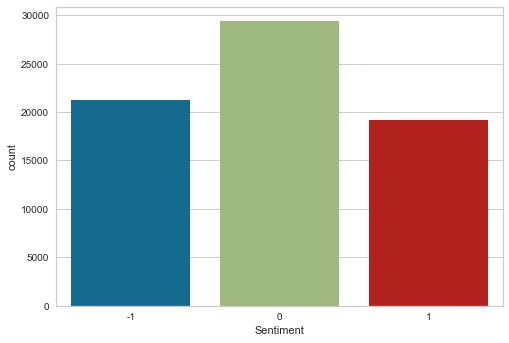

In [17]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Sentiment",data=df)

In [18]:
#for text classification, we need to take of very common english words, that can occur several times in a sentence
#we are going to use stopwords for this
stop_words = set(stopwords.words("english"))

In [19]:
#list of stopwords, these are very commonly used english words that can affect prediction when doing text classsification
#need to cater for this
print(stop_words)

{'yourself', 'below', 'weren', 'haven', 'at', 'all', 'hadn', 'does', 'while', 'into', 'is', 'other', 'few', "don't", 'which', 's', 'hers', 'doesn', 'wasn', 'were', 'most', 'd', 'why', 'or', 'some', 'me', 'did', 'been', "doesn't", 'who', 'ain', 'the', 'but', 'had', 'has', 'mightn', 'because', 'herself', "wouldn't", "didn't", 'doing', 'their', 'out', 'yourselves', 'from', 'just', "couldn't", 'of', 'needn', 'don', "should've", "you'll", "hasn't", "haven't", 'on', 'before', 'so', 'was', 'here', 'after', 'll', "weren't", 'mustn', 'this', 'being', 'for', 'an', 'as', 'what', 'ma', 'by', 'them', 'under', 'will', 'these', "won't", 'can', "wasn't", 'they', 'whom', 'y', 'ours', "shan't", 'and', 'yours', 'up', 'then', 'am', 'how', 'do', 'we', 'have', 'above', 'very', 'such', 'ourselves', 'each', 'm', 'than', 'when', 'any', 'a', 'until', 'now', 'myself', "aren't", "you'd", 'down', 'you', 'further', "mightn't", 'not', 'he', 'themselves', 'to', "shouldn't", 'during', 'in', 'himself', 'itself', 'if', 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

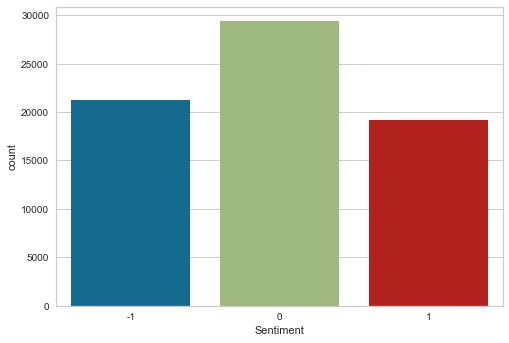

In [20]:
#checking the class, and we can notice that there is a class imbalance, data consists of more negative class
sns.countplot(x="Sentiment",data=df)

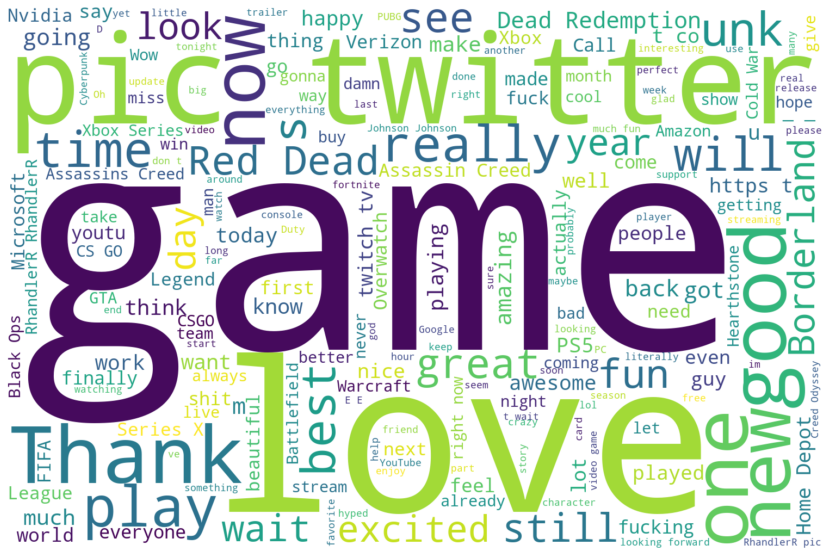

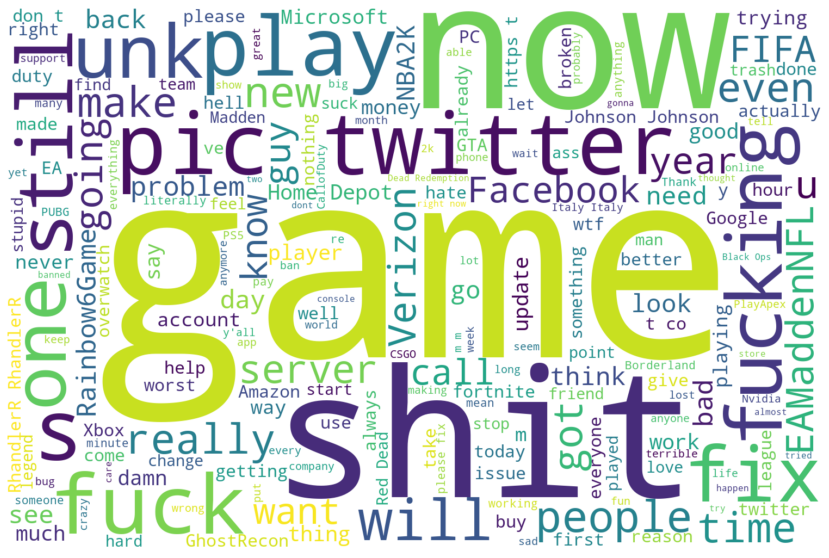

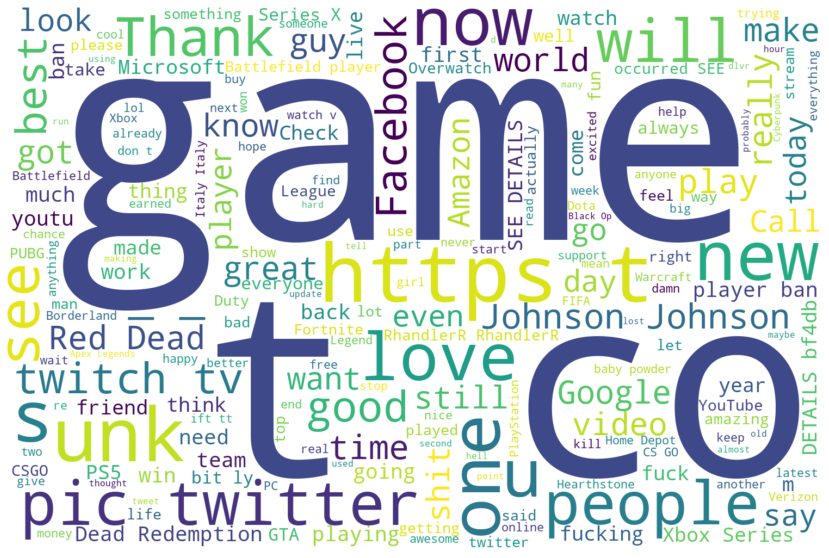

In [21]:
# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==-1]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Generating a word cloud of frequency of text
train_s0 = df[df.Sentiment ==0]
# Generating a word cloud of frequency of text
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", width=1500, height=1000).generate(" ".join(train_s0['Text']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Text Cleaner

In [22]:
#this code will replace all digits found in text with nothin for example borderland 2 --> borderland
df["Text"] = df["Text"].str.replace("\d","")

In [23]:
#this function will first tokenize the data, which means will create list of words from the sentences
#to tackle punctuations we can use regular expressions, translation or simply use isalpha() function bearing in mind that space 
#is eliminated with this function we will tokenize the text first, to note that if there is a massive dataset translate is the most efficient function
#https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
#after this the next step will be to remove stop words from the words
#next step will be to apply lemmatization,porter lemmatizer has been used in our case, for example words like coming,came,comes --> come

def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)

In [24]:
df["Text"] = df["Text"].apply(cleaner)
df["Text"].head()

0     im get borderland murder
1             come border kill
2       im get borderland kill
3    im come borderland murder
4     im get borderland murder
Name: Text, dtype: object

In [25]:
df["Text"]=df["Text"].str.replace("im","")
df["Text"].head()

0      get borderland murder
1           come border kill
2        get borderland kill
3     come borderland murder
4      get borderland murder
Name: Text, dtype: object

## Rare Words

In [26]:
rare_words = pd.Series(" ".join(df["Text"]).split()).value_counts()
rare_words

game               10775
play                6816
get                 5567
like                5149
go                  4216
                   ...  
tgo                    1
tlosgo                 1
naus                   1
batlelfield            1
fluidmediasolut        1
Length: 22226, dtype: int64

In [27]:
rare_words = rare_words[rare_words <= 2]

In [28]:
df["Text"] = df["Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))

## Word Cloud

In [29]:
# plt.figure(figsize=(16,12))
# wordcloud = WordCloud(background_color="black",max_words=500, width=1500, height=1000).generate(' '.join(df['Text']))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

## Train test split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [31]:
X = df["Text"]
y = df["Sentiment"]

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42)

## Count Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_test_count = vt.transform(X_test)

In [35]:
print(X_train_count.toarray())
X_train_count

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<48838x14085 sparse matrix of type '<class 'numpy.int64'>'
	with 479870 stored elements in Compressed Sparse Row format>

## Adaboost Classifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators = 100)
ABC.fit(X_train_count,y_train)

AdaBoostClassifier(n_estimators=100)

In [37]:
ABC_pred = ABC.predict(X_test_count)
ABC_train_pred = ABC.predict(X_train_count)

In [38]:
# Classification Report
cr = classification_report(y_test,ABC_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.64      0.52      0.57      6364
           0       0.54      0.70      0.61      8907
           1       0.58      0.43      0.49      5660

    accuracy                           0.57     20931
   macro avg       0.59      0.55      0.56     20931
weighted avg       0.58      0.57      0.57     20931



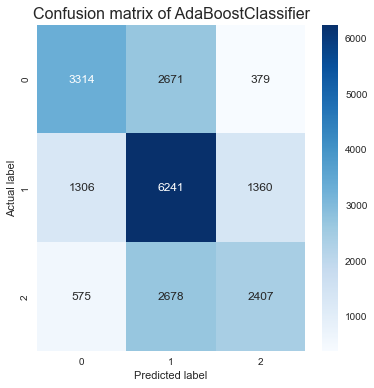

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, ABC_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.title('Confusion matrix of AdaBoostClassifier', fontsize = 16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


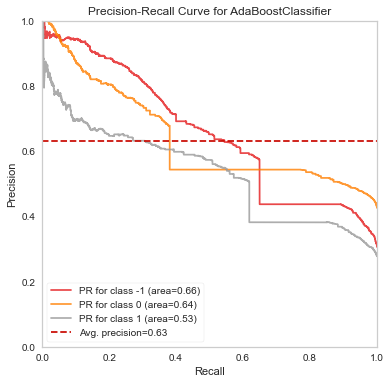

In [40]:
viz = PrecisionRecallCurve(ABC,classes=ABC.classes_,per_class=True,cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

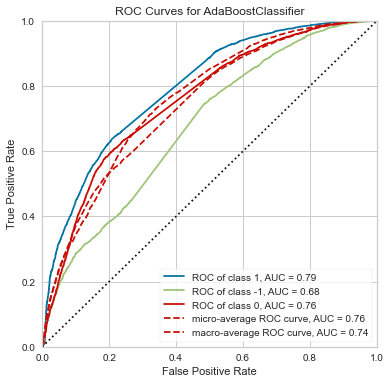

In [41]:
viz = ROCAUC(ABC, classes=ABC.classes_, per_class=True,map="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_count,y_train)
dtc_pred = dtc.predict(X_test_count)
dtc_train_pred = dtc.predict(X_train_count)

In [43]:
# Classification Report
cr = classification_report(y_test,dtc_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84      6364
           0       0.86      0.83      0.84      8907
           1       0.80      0.81      0.81      5660

    accuracy                           0.83     20931
   macro avg       0.83      0.83      0.83     20931
weighted avg       0.83      0.83      0.83     20931



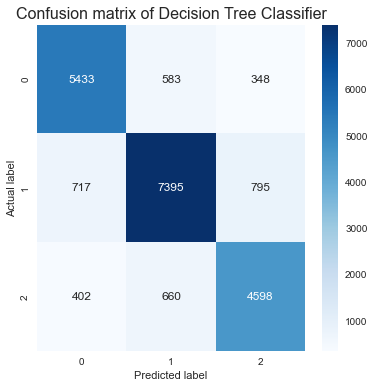

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, dtc_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.8g')
plt.title('Confusion matrix of Decision Tree Classifier', fontsize = 16)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


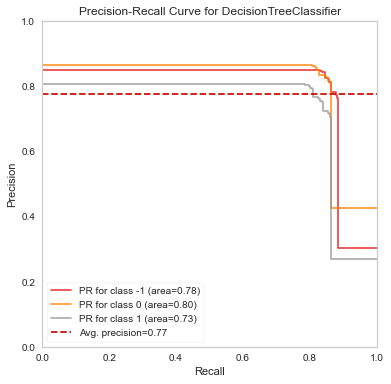

In [45]:
viz = PrecisionRecallCurve(dtc,classes=dtc.classes_,per_class=True,cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

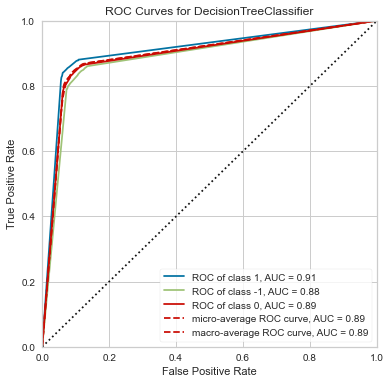

In [46]:
viz = ROCAUC(dtc, classes=dtc.classes_, per_class=True,map="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

##  Comparison

In [47]:
pred_df = pd.DataFrame({"ADB":[accuracy_score(y_test,ABC_pred)],
                      "dtc": [accuracy_score(y_test,dtc_pred)]})

train_pred = pd.DataFrame({"ADB":[accuracy_score(y_test,ABC_pred)],
                      "dtc": [accuracy_score(y_test,dtc_pred)]})

<AxesSubplot:>

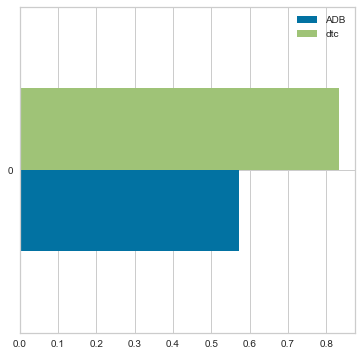

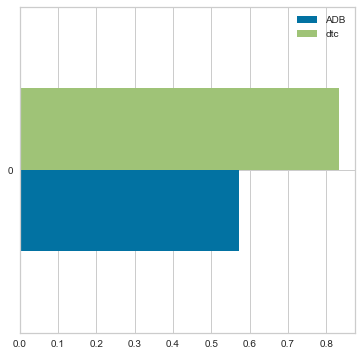

In [48]:
pred_df.plot(kind="barh")
train_pred.plot(kind="barh")

In [87]:
#using ANN to apply deep learning technique
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [88]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK')

tokenizer.fit_on_texts(X_train)

In [89]:
tokenizer.texts_to_sequences([X_train[0]])

[[4, 74, 1109]]

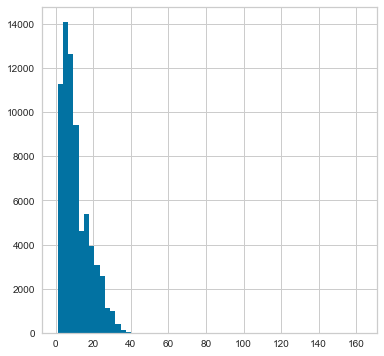

In [90]:
#padding
lengths = [len(t.split(' ')) for t in X]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [91]:
#any tweet more than 50 words will be chopped
maxlen=40

In [76]:
#all example will have same input size
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post',padding='post',maxlen=maxlen)
  return padded

In [92]:
padded_train_seq = get_sequences(tokenizer, X_train)
padded_test_seq = get_sequences(tokenizer, X_test)

In [93]:
padded_train_seq[0]

array([   9,  178, 7598,   30,  145, 1631,  264, 1743, 2077,  136,    9,
        171,   37,  304, 4823,  845,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0])

In [95]:
len(y_train)

48838

In [96]:
len(padded_train_seq)

48838

In [97]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [98]:
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [99]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [100]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [101]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [102]:
#Fitting ANN
ann.fit(padded_train_seq,y_train,batch_size=32,epochs = 10)

Epoch 1/100
1527/1527 [==============================] - 2s 719us/step - loss: -440.9620 - accuracy: 0.4159
Epoch 2/100
1527/1527 [==============================] - 2s 1ms/step - loss: -7991.7080 - accuracy: 0.4195
Epoch 3/100
1527/1527 [==============================] - 1s 687us/step - loss: -37245.2969 - accuracy: 0.4195
Epoch 4/100
1527/1527 [==============================] - 1s 864us/step - loss: -95312.6172 - accuracy: 0.4195
Epoch 5/100
1527/1527 [==============================] - 1s 954us/step - loss: -184505.5625 - accuracy: 0.4195
Epoch 6/100
1527/1527 [==============================] - 1s 925us/step - loss: -310795.1250 - accuracy: 0.4195
Epoch 7/100
1527/1527 [==============================] - 1s 947us/step - loss: -477251.0000 - accuracy: 0.4195
Epoch 8/100
1527/1527 [==============================] - 1s 705us/step - loss: -688944.3750 - accuracy: 0.4195
Epoch 9/100
1527/1527 [==============================] - 1s 678us/step - loss: -945732.9375 - accuracy: 0.4195
Epoch 10/1

1527/1527 [==============================] - 1s 699us/step - loss: -316181664.0000 - accuracy: 0.4195
Epoch 74/100
1527/1527 [==============================] - 1s 747us/step - loss: -328737152.0000 - accuracy: 0.4195
Epoch 75/100
1527/1527 [==============================] - 1s 770us/step - loss: -341697664.0000 - accuracy: 0.4195
Epoch 76/100
1527/1527 [==============================] - 1s 736us/step - loss: -354854944.0000 - accuracy: 0.4195
Epoch 77/100
1527/1527 [==============================] - 1s 720us/step - loss: -368294560.0000 - accuracy: 0.4195
Epoch 78/100
1527/1527 [==============================] - 1s 754us/step - loss: -382184704.0000 - accuracy: 0.4195
Epoch 79/100
1527/1527 [==============================] - 1s 816us/step - loss: -396679744.0000 - accuracy: 0.4195
Epoch 80/100
1527/1527 [==============================] - 1s 753us/step - loss: -411400960.0000 - accuracy: 0.4195
Epoch 81/100
1527/1527 [==============================] - 1s 822us/step - loss: -426180416.00

In [103]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)), #output at every timestep
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')                                                     
        ])
        
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 40, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [111]:
!pip install nlp

  Using cached nlp-0.4.0-py3-none-any.whl (1.7 MB)
  Using cached dill-0.3.5.1-py2.py3-none-any.whl (95 kB)


In [114]:
pip install datasets

  Using cached responses-0.18.0-py3-none-any.whl (38 kB)
  Using cached huggingface_hub-0.7.0-py3-none-any.whl (86 kB)
Note: you may need to restart the kernel to use updated packages.


In [124]:
from datasets import load_dataset

In [125]:
dataset = load_dataset("csv",data_files="twitter_validation.csv")

Using custom data configuration default-c65982527f12d269
Reusing dataset csv (C:\Users\Avish\.cache\huggingface\datasets\csv\default-c65982527f12d269\0.0.0\51cce309a08df9c4d82ffd9363bbe090bf173197fc01a71b034e8594995a1a58)


  0%|          | 0/1 [00:00<?, ?it/s]

In [127]:
train = dataset['train']

In [128]:
train[0]

{'3364': 352,
 'Facebook': 'Amazon',
 'Irrelevant': 'Neutral',
 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"}

In [107]:
def get_tweet(data):
  text = [x['Text'] for x in data]
  labels = [x['Sentiment'] for x in data]
  return text, labels

In [108]:
val_tweets, val_labels = get_tweet(X_train)
val_seq = get_sequences(tokenizer,val_tweets)
val_labels = names_to_ids(val_labels)

TypeError: string indices must be integers